In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsRegressor

In [61]:
df = pd.read_excel('StockX.xlsx')
df.drop(['Tên giày'], axis = 1, inplace = True)


Accuracy for SVM: 0.029411764705882353


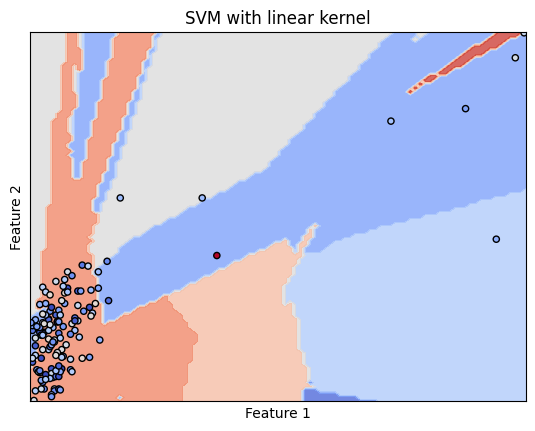

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# Đọc dữ liệu từ tập tin Excel
df = pd.read_excel('StockX.xlsx')


# Chọn các cột đặc trưng và nhãn
X = df[['Giá bán gần nhất', 'Giá bán trung bình']]
y = df['Biến động giá']

# Chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sử dụng SVM
svm_clf = SVC(kernel='linear')  # Chọn kernel tùy thuộc vào loại dữ liệu
svm_clf.fit(X_train, y_train)  # Không giới hạn số cột đặc trưng

# Dự đoán trên tập kiểm tra
y_pred_svm = svm_clf.predict(X_test)
# Đánh giá độ chính xác
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy for SVM: {accuracy_svm}")

# Vẽ biên quyết định của SVM trên tập dữ liệu 2D
titles = ["SVM with linear kernel"]

fig, sub = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip([svm_clf], titles, [sub]):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="Feature 1",
        ylabel="Feature 2",
    )

    ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Tải dữ liệu từ tệp Excel StockX
df = pd.read_excel('StockX.xlsx')

# Chọn các cột liên quan
X = df[['Giá bán trung bình']]
y = df['Giá bán gần nhất']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tạo mô hình phân loại SVM
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = svm_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# In kết quả
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)



Accuracy: 0.029411764705882353
Classification Report:
               precision    recall  f1-score   support

          81       0.00      0.00      0.00         1
          82       0.00      0.00      0.00         3
          86       0.00      0.00      0.00         5
          87       0.00      0.00      0.00         1
          89       0.00      0.00      0.00         2
          90       0.00      0.00      0.00         2
          91       0.00      0.00      0.00         1
          92       0.00      0.00      0.00         1
          93       0.00      0.00      0.00         0
          94       0.00      0.00      0.00         1
          95       0.00      0.00      0.00         2
          96       0.00      0.00      0.00         1
          97       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1
          99       0.00      0.00      0.00         1
         100       0.00      0.00      0.00         1
         101       0.00   

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 